In [1]:
!pip install shap
!pip install bayesian-optimization
!pip install lime 

     |████████████████████████████████| 358kB 5.2MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=acde099eb18159d49286ba50d4a092b3b456d94bbd1065a5f44103386ba0a6bb
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11686 sha256=d474780d954965b9d937b3e96b921fce1f76c8a09feb673d97cb4998a4d8db49
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization
     |████████████████████████████████| 276kB 5.1MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283858 sha256=05da541f12533d7015b22b2491bc88e1a1da50f4f5a70193de8f7ac9c71a8fa3
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully b

In [2]:
#import packages and verify versions


# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# nltk
import nltk
print('nltk: %s' % nltk.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# wordcloud
import wordcloud
print('wordcloud: %s' % wordcloud.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# PIL
import PIL
print('PIL: %s' % PIL.__version__)
# spacy
import spacy
print('spacy: %s' % spacy.__version__)

numpy: 1.19.5
scipy: 1.4.1
matplotlib: 3.2.2
pandas: 1.1.5
nltk: 3.2.5
sklearn: 0.22.2.post1
wordcloud: 1.5.0
keras: 2.5.0
tensorflow: 2.5.0
PIL: 7.1.2
spacy: 2.2.4


In [49]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import string
import collections
import time
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import gc
import itertools
import tensorflow as tf    
# tf.compat.v1.disable_v2_behavior() # <-- HERE !


from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from nltk.corpus import stopwords
from nltk import tokenize, sent_tokenize, word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import average_precision_score, precision_recall_curve, accuracy_score, roc_auc_score, f1_score,confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import linear_model


from keras import models
from keras import layers
from keras import regularizers

# Word cloud visualization libraries
from PIL import Image


from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from collections import Counter




from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, load_model
from keras.layers import Embedding
from keras.layers import Flatten, Dense, Dropout, AlphaDropout, ThresholdedReLU, Convolution1D, ZeroPadding1D, Activation, MaxPooling1D, SpatialDropout1D, Input 
from keras.layers import GlobalMaxPooling1D, concatenate, LSTM, Bidirectional,BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.wrappers.scikit_learn import KerasClassifier

nltk.download('punkt')

pd.set_option('display.max_colwidth',None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/"
base_dir = root_dir 
checkpoint_dir = base_dir +'/data'

Mounted at /content/drive


In [7]:

NUM_LABELS = 2
DATA_PATH = base_dir + 'IMDB Dataset.csv'

In [8]:
# export
def read_data(path):
    """
    returns a pandas DataFrame from path   
    """
    df = pd.read_csv(path)
    # df = df[(df['Ocena'] != 'Bez oceny')][['Ocena','Tekst']]
    # df = df.rename(columns={'Ocena': 'LABEL_COLUMN_NAME', 'Tekst': 'TEXT_COLUMN_NAME'})
    return df

In [9]:
df = read_data(DATA_PATH)
df.head()


,review,sentiment
0,"An excellent cast who do their best with an awful script, inept direction, and some of the worst score that I have ever heard. More TV movie of the week than serious drama. Which is sad when one considers that the source material is very serious and very real. The film makers decided that instead of building drama and character, it was better to just show the most graphic and violent bits and hope that the audience would be shocked into sympathy and caring. In my opinion, one the most blatant forms of cut and paste film adapting.",negative
1,"A dreary and pointless bit of fluff (bloody fluff, but fluff). Badly scripted, with inane and wooden dialogue. You do not care if the characters (indeed, even if the actors themselves) live or die. Little grace or charm, little action, little point to the whole thing. Perhaps some of the set and setting will interest--those gaps between the boards of all the buildings may be true to the way life was lived. The framework encounter is unnecessary and distracting, and the Hoppalong Cassidy character himself is both boring and inept.",negative
2,If the writer/director is reading this (and I imagine you are since you should now be out of work) then I must tell you - I have seen some bad movies in my time but this one gets the distinction of having the worst premise I've ever heard.<br /><br />SPOILERS - Nothing happens! <br /><br />A total waste of time. I laughed out loud at the end. <br /><br />SIDE NOTE - (if the whole movie was her in a coma then does the scene where she sleeps with that guy mean someone raped her while she was knocked out?)<br /><br />Utter rubbish.,negative
3,"This is a classic B type movie that you'd rather not waste your time and see. It started well and i thought it will grow up as a good thriller, but i was mistaking. All movie long you get the feeling that soon something interesting will take place and it will suddenly turn into a tensed thriller, but that doesn't happen. It runs slowly and peacefully til the end, with nothing interesting in it. Just the ending was unexpected and original, but that's it. Vote: 2.5 out of 10. Oh, one more thing. Why is this movie rated R anyway???",negative
4,"A short review but...<br /><br />Avoid at all costs, a thorough waste of 90mins. At the end of the film I was none the wiser as to what had actually happened. It's full of cameos (Stephen Fry (3mins), Jack Dee (30 secs), the ""Philadelphia"" girls) and some vaguely recognisable people but it just doesn't make any sense. Whether the story just got lost in the edit I don't now but jeez...<br /><br />Put on a DVD instead or go to bed and get some rest!!!<br /><br />2 out of 10 (for the cameos and a Morris Minor car chase)<br /><br />",negative


In [10]:
df.sentiment.value_counts()

positive    25000
negative     2502
Name: sentiment, dtype: int64

**!!!!!Please uncomment this code and create embeddings catalog; it will upload embeddings**

In [15]:
# !wget "https://nlp.stanford.edu/data/glove.6B.zip"

In [16]:
# !unzip "/content/glove.6B.zip" -d "/content/drive/My Drive/data/embeddings"
# !ls
# !rm glove.6B.zip

In [17]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz

In [18]:
# !gzip -c "cc.en.300.vec.gz" > "/content/drive/My Drive/data/embeddings/cc.en.300.vec"
# !ls
# !rm cc.en.300.vec.gz

In [20]:


# EMBEDDINGS FILE 
GLOVE_EMBEDDINGS_FILE = 'data/embeddings/glove.6B.100d.txt'
FASTTEXT_EMBEDDINGS_FILE = 'data/embeddings/cc.en.300.vec'

# from gensim.models import KeyedVectors

# if __name__ == '__main__':
#     word2vec = KeyedVectors.load_word2vec_format("glove_100_3_polish.txt")

# parameters for learning
# Parameter indicating the number of words we'll put in the dictionary
# (change it per source)
NB_WORDS = 10000
VAL_SIZE = 1000  # Size of the validation set
NB_EPOCHS = 15  # Number of epochs
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
# Maximum number of words in a sequence (see the sentence distribution)
MAX_LEN = 250
EMBEDDING_DIM = 100  # Number of dimensions of the GloVe word embeddings
FASTTEXT_EMBEDDING_DIM = 300  # Number of dimensions of the FastText word embeddings
MAX_SENT_LEN = 300  # character based length
MAX_DOC_LEN = 5  # Number of sentences in text

# labels
LABELS = ['positive','negative']
label_map = {'negative':1, 'positive':0}


In [21]:
text = df['review']
sentiments = df['sentiment']

df['sentiment'] = df['sentiment'].apply(lambda x : label_map[x])
# Output first ten rows
df.head(10)

,review,sentiment
0,"An excellent cast who do their best with an awful script, inept direction, and some of the worst score that I have ever heard. More TV movie of the week than serious drama. Which is sad when one considers that the source material is very serious and very real. The film makers decided that instead of building drama and character, it was better to just show the most graphic and violent bits and hope that the audience would be shocked into sympathy and caring. In my opinion, one the most blatant forms of cut and paste film adapting.",1
1,"A dreary and pointless bit of fluff (bloody fluff, but fluff). Badly scripted, with inane and wooden dialogue. You do not care if the characters (indeed, even if the actors themselves) live or die. Little grace or charm, little action, little point to the whole thing. Perhaps some of the set and setting will interest--those gaps between the boards of all the buildings may be true to the way life was lived. The framework encounter is unnecessary and distracting, and the Hoppalong Cassidy character himself is both boring and inept.",1
2,If the writer/director is reading this (and I imagine you are since you should now be out of work) then I must tell you - I have seen some bad movies in my time but this one gets the distinction of having the worst premise I've ever heard.<br /><br />SPOILERS - Nothing happens! <br /><br />A total waste of time. I laughed out loud at the end. <br /><br />SIDE NOTE - (if the whole movie was her in a coma then does the scene where she sleeps with that guy mean someone raped her while she was knocked out?)<br /><br />Utter rubbish.,1
3,"This is a classic B type movie that you'd rather not waste your time and see. It started well and i thought it will grow up as a good thriller, but i was mistaking. All movie long you get the feeling that soon something interesting will take place and it will suddenly turn into a tensed thriller, but that doesn't happen. It runs slowly and peacefully til the end, with nothing interesting in it. Just the ending was unexpected and original, but that's it. Vote: 2.5 out of 10. Oh, one more thing. Why is this movie rated R anyway???",1
4,"A short review but...<br /><br />Avoid at all costs, a thorough waste of 90mins. At the end of the film I was none the wiser as to what had actually happened. It's full of cameos (Stephen Fry (3mins), Jack Dee (30 secs), the ""Philadelphia"" girls) and some vaguely recognisable people but it just doesn't make any sense. Whether the story just got lost in the edit I don't now but jeez...<br /><br />Put on a DVD instead or go to bed and get some rest!!!<br /><br />2 out of 10 (for the cameos and a Morris Minor car chase)<br /><br />",1
5,"This film is quite boring. There are snippets of naked flesh tossed around in a lame attempt to keep the viewer awake but they don't succeed.<br /><br />The best thing about the movie is Lena Olin--she does a masterful job handling her character, but Day-Lewis garbles most of his lines.<br /><br />Kaufman clearly had no idea how to film this. The incongruities in bouncing between domestic household/marriage issues and political crises are badly matched. Character attitudes change without explanation throughout. Badly disjointed.",1
6,"Everything about this movie is bad. everything. Ridiculous 80's haircuts. Ridiculous moustaches. Ridiculous action and fight scenes where you can actually see that the adversaries do not even hit each other. Bad, bad, bad 80's music. Repeated scenes of people running through woods. A bad guy with a silver plastic hand and silly hair. Stupid dialogue. The acting is nonexistant. Everything looks extremely cheap. This movie even surpasses ""Plan 9 from outer space"" in its utter badness.<br /><br />It's not ""funny bad"" it's just bad.",1
7,"""Whipped"" is 82 minutes long. This review is 82 words long. Three unlikable New York Lotharios, ruthless ""scammers,"" end up wooing the same woman, played by Amanda Peet, with disastr

In [22]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

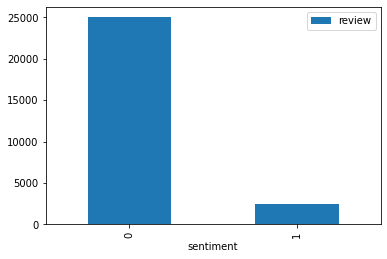

In [24]:

df.groupby('sentiment').count().plot(kind='bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f443348b310>]],
      dtype=object)

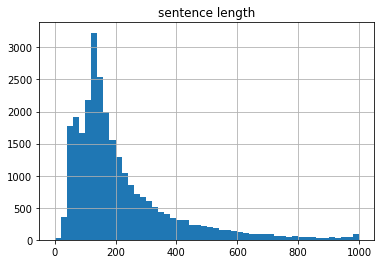

In [25]:
pd.DataFrame([len(x.split()) for x in df['review']],columns= ['sentence length']).hist(bins=50,range=(0,1000))

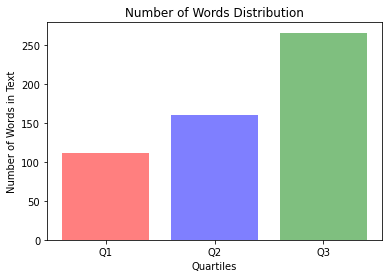

2228

In [26]:
# ADD WORDS DERIVED COLUMN
data = df.copy()
data['NUMBER_OF_WORDS_COLUMN'] = data['review'].str.split().apply(len)
stats = data['NUMBER_OF_WORDS_COLUMN'].describe()

quartiles = ['Q1', 'Q2', 'Q3']
top = [stats['25%'], stats['50%'], stats['75%']]
plt.bar(
    quartiles,
    top,
    align='center',
    color=[
        'red',
        'blue',
        'green'],
    alpha=0.5)
plt.ylabel('Number of Words in Text')
plt.xlabel('Quartiles')
plt.title('Number of Words Distribution')

plt.show()
del data

gc.collect()

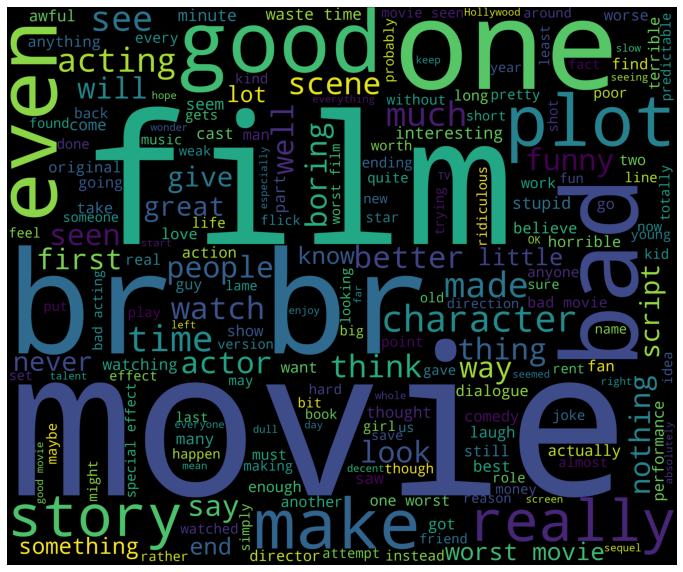

In [27]:
negative_df = df[df['sentiment'] == 1]
negative_df.head()
words = ' '.join(negative_df['review'])
negative_cleaned_words = " ".join([word for word in words.split()

                                   ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(negative_cleaned_words)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

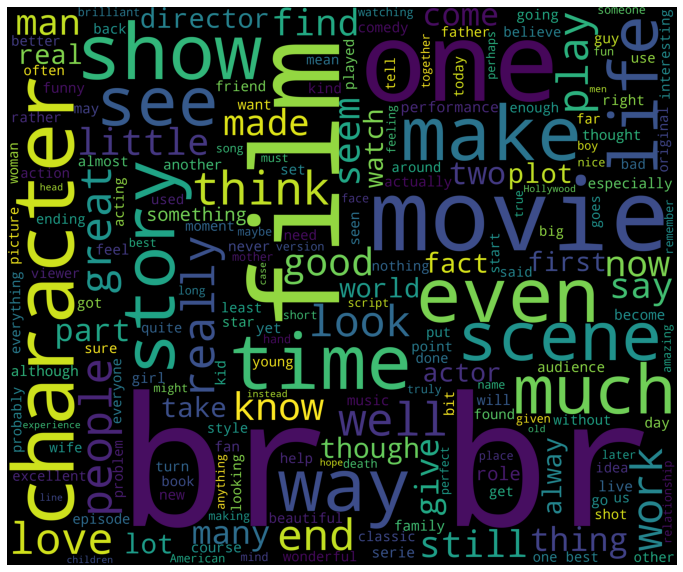

In [28]:
positive_df = df[df['sentiment'] == 0]
all_positive_words = ' '.join(positive_df['review'])
positive_cleaned_words = " ".join([word for word in all_positive_words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                      ).generate(positive_cleaned_words)
plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
corpus = df['review'].tolist()
words = [tokenize.word_tokenize(x) for x in corpus]
words = [y for x in words for y in x]
word_freq = pd.DataFrame(nltk.FreqDist(words).most_common(1000), columns=['word','freq'])
print(word_freq)

         word    freq
0         the  301471
1           ,  289127
2           .  242446
3         and  173220
4           a  161254
..        ...     ...
995  stunning     588
996      cute     588
997      wait     587
998      'The     586
999   telling     585

[1000 rows x 2 columns]


In [30]:
spacy_nlp = spacy.load("en_core_web_sm")
stopwords_list = spacy.lang.en.stop_words.STOP_WORDS
stopwords_list

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [31]:

re.sub('\'', '', string.punctuation)

'!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
spacy_nlp = spacy.load("en_core_web_sm")
table =str.maketrans('','',re.sub('\'', '', string.punctuation)) # without "'"
# remove stop words with exceptions
def remove_stopwords(input_text):

    stopwords_list = spacy.lang.en.stop_words.STOP_WORDS
    # Words which might indicate a certain sentiment we want to keep them
    white_list = ["not", "no", "n't"]
    words = input_text.lower().split()
    clean_words = [word for word in words if (
        word not in stopwords_list or word in white_list) and 
        # word.isalpha() and 
        len(word) > 1
        ]
    return " ".join(clean_words)
# remove mentions


def remove_br(text):
    return re.sub(r'<br /><br />', ' ', text)

def remove_punctuation(text):

    return text.translate(table)



df['review'] = df['review'].apply(remove_stopwords).apply(remove_br).apply(remove_punctuation)
df.head()

,review,sentiment
0,excellent cast best awful script inept direction worst score heard tv movie week drama sad considers source material real film makers decided instead building drama character better graphic violent bits hope audience shocked sympathy caring opinion blatant forms cut paste film adapting,1
1,dreary pointless bit fluff bloody fluff fluff badly scripted inane wooden dialogue not care characters indeed actors themselves live die little grace charm little action little point thing set setting interestthose gaps boards buildings true way life lived framework encounter unnecessary distracting hoppalong cassidy character boring inept,1
2,writerdirector reading and imagine work tell seen bad movies time gets distinction having worst premise i've heard spoilers happens a total waste time laughed loud end side note if movie coma scene sleeps guy mean raped knocked out utter rubbish,1
3,classic type movie you'd not waste time see started thought grow good thriller mistaking movie long feeling soon interesting place suddenly turn tensed thriller doesn't happen runs slowly peacefully til end interesting it ending unexpected original that's it vote 25 10 oh thing movie rated anyway,1
4,short review but avoid costs thorough waste 90mins end film wiser actually happened it's cameos stephen fry 3mins jack dee 30 secs philadelphia girls vaguely recognisable people doesn't sense story got lost edit don't jeez put dvd instead bed rest 2 10 for cameos morris minor car chase,1


In [33]:
X_train_, X_test_, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], stratify= df['sentiment'] ,test_size=0.15, shuffle = True,random_state=37)
print('# Train data samples:', X_train_.shape[0])
print('# Test data samples:', X_test_.shape[0])
assert X_train_.shape[0] == y_train.shape[0]
assert X_test_.shape[0] == y_test.shape[0]


# Train data samples: 23376
# Test data samples: 4126


In [34]:
X_train_

9120                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             minute pray second die clay mccord alex cord unhappy outlaw thousand dollar bounty head degenerative epilepsy realizing days outlaw numbered wants desperately though somewhat reluctantly advantage amnesty granted rough tumble territorial governor robert ryan excellent performance badly wants mccord renounce ways accept amnesty example bandit

In [35]:
tfidf_vec = TfidfVectorizer(
 tokenizer=word_tokenize,
 token_pattern=None
 )
 # fit tfidf_vec on training data reviews
tfidf_vec.fit(X_train_)
 # transform training and validation data reviews
X_train_all = tfidf_vec.transform(X_train_)
X_test = tfidf_vec.transform(X_test_)

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_all, y_train, test_size=0.15, random_state=37)

In [37]:

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train.shape[0] == y_train.shape[0]

print('Shape of training set:', X_train.shape)
print('Shape of validation set:', X_valid.shape)

Shape of training set: (19869, 103455)
Shape of validation set: (3507, 103455)


In [38]:
X_train_, X_test_, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], stratify= df['sentiment'] ,test_size=0.15, shuffle = True,random_state=37)
print('# Train data samples:', X_train_.shape[0])
print('# Test data samples:', X_test_.shape[0])
assert X_train_.shape[0] == y_train.shape[0]
assert X_test_.shape[0] == y_test.shape[0]

# Train data samples: 23376
# Test data samples: 4126


In [39]:
# tokenization with max words defined and filters
tk = Tokenizer(num_words=NB_WORDS)
tk.fit_on_texts(X_train_)
word_index = tk.word_index
print("Unique words : {}".format(len(word_index)))
print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))

Unique words : 112935
Fitted tokenizer on 23376 documents
10000 words in dictionary


In [40]:
word_index = tk.word_index
print("Unique words : {}".format(len(word_index)))

Unique words : 112935


In [41]:
# convert train and test to sequence using the tokenizer
X_train_seq_tok = tk.texts_to_sequences(X_train_)
X_test_seq_tok = tk.texts_to_sequences(X_test_)

# pad the sequences 
X_train_all_cnn = pad_sequences(X_train_seq_tok,  padding='post',maxlen=MAX_LEN)
X_test_cnn = pad_sequences(X_test_seq_tok,  padding='post',maxlen=MAX_LEN)





In [42]:
X_train_cnn, X_valid_cnn, y_train, y_valid = train_test_split(
    X_train_all_cnn, y_train, test_size=0.15, random_state=37)

assert X_valid_cnn.shape[0] == y_valid.shape[0]
assert X_train_cnn.shape[0] == y_train.shape[0]

print('Shape of training set:', X_train_cnn.shape)
print('Shape of validation set:', X_valid_cnn.shape)

Shape of training set: (19869, 250)
Shape of validation set: (3507, 250)


In [43]:
X_train_cnn

array([[1245,  724,  416, ...,    0,    0,    0],
       [ 289,  410,  148, ...,    0,    0,    0],
       [   8,   95, 2064, ...,    0,    0,    0],
       ...,
       [ 392,   71,  409, ...,    0,    0,    0],
       [ 387,    7,  786, ...,    0,    0,    0],
       [  73,    2,  158, ...,    0,    0,    0]], dtype=int32)

In [44]:
print(y_train.value_counts(normalize= True))
print(y_valid.value_counts(normalize= True))
print(y_test.value_counts(normalize= True))

0    0.908954
1    0.091046
Name: sentiment, dtype: float64
0    0.909324
1    0.090676
Name: sentiment, dtype: float64
0    0.909113
1    0.090887
Name: sentiment, dtype: float64


**First model baseline TfidfVectorizer  + LogisticRegression**

In [61]:



def train_model(model, X_train, y_train, X_valid, y_valid):
    """
    This function trains the deep model using the training set and valdiation set.

    :param model: the Keras Classifier Model
    :param X_train: train sequences
    :param y_train: trian labels
    :return: a list of actual labels

    """
    start = time.time()
    checkpoints = []
    model.compile(
        optimizer=Adam(),
        loss='binary_crossentropy',
        metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
    checkpoint_file = checkpoint_dir + '/Checkpoints/Train-' + model.name + '-best_weights.h5'
    checkpoints.append(
        ModelCheckpoint(
            checkpoint_file,
            monitor='val_loss',
            verbose=0,
            save_best_only=True,
            save_weights_only=True,
            mode='auto',
            period=1))
    checkpoints.append(EarlyStopping(monitor='val_loss', patience=5))

    history = model.fit(
        X_train,
        y_train,
        epochs=NB_EPOCHS,
        batch_size=BATCH_SIZE,
        validation_data=(
            X_valid,
            y_valid),
        verbose=1,
        callbacks=checkpoints)
    # load the weights from the checkpoint file, the best weights
    model.load_weights(checkpoint_file)
    end = time.time()
    total_time = end - start
    print("Model Training and Validation time %s secs" % (total_time))
    return model,history


def eval_metric(history, metric_name):

    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, min(len(metric),NB_EPOCHS) + 1)

    plt.plot(e, metric, color='navy', label='Train ' + metric_name)
    plt.plot(e, val_metric, color='red', label='Validation ' + metric_name)
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()
    plt.show()

# From:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def test_model(model, X_test, y_test):
    start = time.time()
    # checkpoint
    checkpoint_file = checkpoint_dir + '/Checkpoints/Train-' + model.name + '-best_weights.h5'
    model.load_weights(checkpoint_file)
    results = model.evaluate(X_test, y_test)
    end = time.time()
    # y_class_index, y_pred_index, confidence, y_softmax = get_predictions_and_confidences(
    #     model, X_test, y_test)
    y_pred_proba = model.predict(X_test)
    y_pred = np.where(y_pred_proba > 0.5, 1,0)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    plot_confusion_matrix(
        cnf_matrix,
        classes=LABELS,
        title="Confusion matrix")
    plt.show()
    total_time = end - start
    print("Model Training and Testing time : %s secs" % (total_time))
    print("Test accuracy score : %s " % (results[1]))
    average_precision = average_precision_score(
        y_test, y_pred_proba )
    average_roc = roc_auc_score(
        y_test, y_pred_proba )
    print('Test average precision score: {0:0.2f}'.format(
        average_precision))
    print('Test ROC AUC  score: {0:0.2f}'.format(
        average_roc))
    print("\n")
    print("Test classification report:\n",classification_report(y_test, y_pred, target_names=LABELS))
    return results


def test_model_runs(
        model,
        X_train,
        y_train,
        X_test,
        y_test,
        epoch_stop=20,
        num_runs=3,
        verbose=0):

    sum_result = 0
    sq_sum_result = 0
    for val in range(0, num_runs):
        base_results = test_model(
            model,
            X_train,
            y_train,
            X_test,
            y_test,
            epoch_stop,
            verbose)
        sum_result = sum_result + base_results[1]
        sq_sum_result = sq_sum_result + base_results[1] * base_results[1]
    mean_accuracy = sum_result / num_runs
    variance = sq_sum_result / num_runs - mean_accuracy * mean_accuracy
    stddev = variance**(.5)
    return mean_accuracy, stddev


def compare_loss(history, base_history, model_name, base_history_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = history.history['val_loss']

    e = range(1, NB_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label=base_history_name)
    plt.plot(e, loss_model, 'red', label=model_name)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()


def read_embedding(path):

    embeddings_index = {}
    f = open(path,encoding = 'utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    f.close()

    return embeddings_index


def create_embedding_matrix(tokenizer, embedding_dim, embeddings_index):

    word_index = tokenizer.word_index
    if tokenizer.num_words:  # if num words is set, get rid of words with too high index
        word_index = {key: word_index[key] for key in word_index.keys()
                      if word_index[key] < (tokenizer.num_words + 1)}
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

    return embedding_matrix


Confusion matrix, without normalization
[[3743    8]
 [ 229  146]]


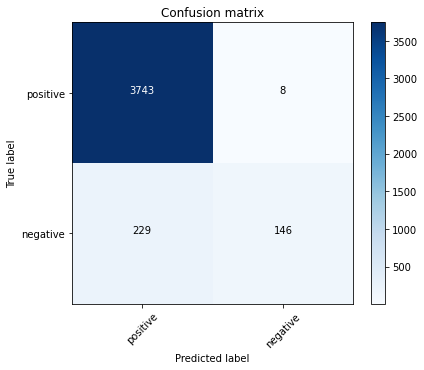

Test accuracy score : 0.94
Test average precision score: 0.86
Test ROC AUC  score: 0.97


Test classification report:
               precision    recall  f1-score   support

    positive       0.94      1.00      0.97      3751
    negative       0.95      0.39      0.55       375

    accuracy                           0.94      4126
   macro avg       0.95      0.69      0.76      4126
weighted avg       0.94      0.94      0.93      4126



In [57]:
LR_model = linear_model.LogisticRegression()
 # fit the model on training data reviews and sentiment
LR_model.fit(X_train, y_train)
# make predictions on test data
# threshold for predictions is 0.5

# calculate accuracy



y_pred_proba = LR_model.predict_proba(X_test)[:,1]
y_pred = LR_model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
plot_confusion_matrix(
    cnf_matrix,
    classes=LABELS,
    title="Confusion matrix")
plt.show()


accuracy = accuracy_score(y_test, y_pred)

average_precision = average_precision_score(
    y_test, y_pred_proba )
average_roc = roc_auc_score(
    y_test, y_pred_proba )

print('Test accuracy score : {0:0.2f}'.format(
    accuracy))
print('Test average precision score: {0:0.2f}'.format(
    average_precision))
print('Test ROC AUC  score: {0:0.2f}'.format(
    average_roc))
print("\n")
print("Test classification report:\n",classification_report(y_test, y_pred, target_names=LABELS))

**Second model Tokenizer + Base CNN**

Model: "BaseCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 250, 100)          1000000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 250, 64)           19264     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 125, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               800100    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 1,819,465
Trainable params: 1,819,465
Non-trainable params: 0
_________________________________________________

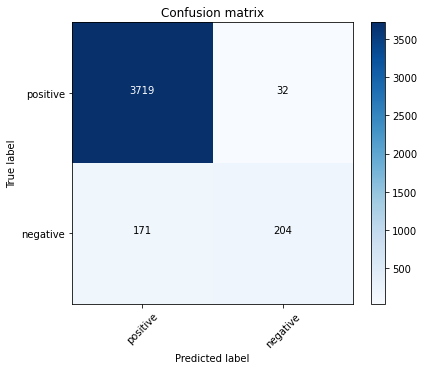

Model Training and Testing time : 9.623582363128662 secs
Test accuracy score : 0.950799822807312 
Test average precision score: 0.81
Test ROC AUC  score: 0.98


Test classification report:
               precision    recall  f1-score   support

    positive       0.96      0.99      0.97      3751
    negative       0.86      0.54      0.67       375

    accuracy                           0.95      4126
   macro avg       0.91      0.77      0.82      4126
weighted avg       0.95      0.95      0.95      4126



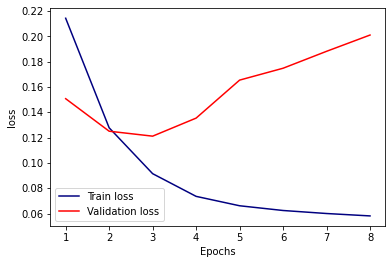

In [62]:
# base cnn model definition
def base_cnn_model():
    model = Sequential(
        [
            Embedding(
                input_dim=NB_WORDS,
                output_dim=EMBEDDING_DIM,
                input_length=MAX_LEN),
            Convolution1D(
                filters=64,
                kernel_size=3,
                padding='same',
                activation='relu'),
            MaxPooling1D(),
            Flatten(),
            Dense(
                100,
                activation='relu'),
            Dense(
                1,
                activation='sigmoid')],
                name = "BaseCNN")
 
    model.summary()
    return model


# train and validate
base_cnn_model = base_cnn_model()
base_model,base_history = train_model(
    base_cnn_model,
    X_train_cnn,
    y_train,
    X_valid_cnn,
    y_valid)
# train the entire training data and test on test data on base model
test_model(base_cnn_model, X_test_cnn, y_test)


eval_metric(base_history, 'loss')

**Third model GLOVE + Kim's CNN**

In [63]:
embeddings = read_embedding(base_dir + GLOVE_EMBEDDINGS_FILE) # read embeddings

Model: "KimCNN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 250, 100)     1000100     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 250, 128)     38528       embedding_4[0][0]                
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 250, 128)     51328       embedding_4[0][0]                
_____________________________________________________________________________________________

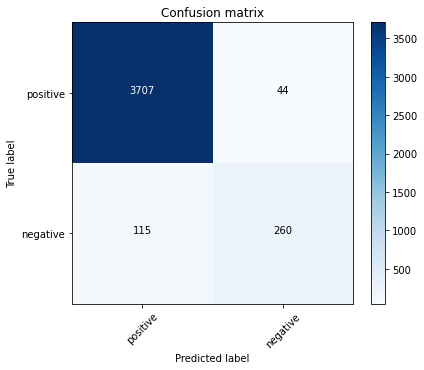

Model Training and Testing time : 38.36986422538757 secs
Test accuracy score : 0.9614638686180115 
Test average precision score: 0.85
Test ROC AUC  score: 0.97


Test classification report:
               precision    recall  f1-score   support

    positive       0.97      0.99      0.98      3751
    negative       0.86      0.69      0.77       375

    accuracy                           0.96      4126
   macro avg       0.91      0.84      0.87      4126
weighted avg       0.96      0.96      0.96      4126



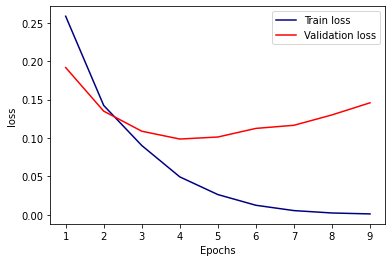

In [64]:
# create embedding matrix 
emb_matrix = create_embedding_matrix(tk, 100, embeddings)


def kim_cnn():
    text_seq_input = Input(shape=(MAX_LEN,), dtype='int32')
    text_embedding = Embedding(NB_WORDS + 1,
                               EMBEDDING_DIM,
                               weights=[emb_matrix],
                               trainable=True,
                               input_length=MAX_LEN)(text_seq_input)

    filter_sizes = [3, 4, 5]
    convs = []
    for filter_size in filter_sizes:
        l_conv = Convolution1D(
            filters=128,
            kernel_size=filter_size,
            padding='same',
            activation='relu')(text_embedding)
        l_pool = MaxPooling1D(filter_size)(l_conv)
        convs.append(l_pool)

    merge = concatenate(convs, axis=1)
    convol = Convolution1D(128, 5, activation='relu')(merge)
    pool1 = GlobalMaxPooling1D()(convol)
    dense = Dense(128, activation='relu', name='Dense')(pool1)
    out = Dense(1, activation='sigmoid')(dense)
    model = Model(
        inputs=[text_seq_input],
        outputs=out,
        name="KimCNN")
    model.summary()
    return model


kim_model = kim_cnn()
base_kim_model,kim_model_history = train_model(
    kim_model, 
    X_train_cnn, 
    y_train, 
    X_valid_cnn, 
    y_valid)
# test the models
test_model(kim_model, X_test_cnn, y_test)

eval_metric(kim_model_history, 'loss')


### **Ensemble with Bayseian Optimizer; We train weighted ensemble**

In [65]:
models_algo = [("BaseCNN",base_cnn_model),
               ("KimCNN",kim_model),
              ]

        BaseCNN    KimCNN        LR  sentiment
0  5.587482e-09  0.000054  0.014491          0
1  2.861129e-01  0.203015  0.167725          0
2  5.195615e-02  0.061660  0.115276          0
3  4.724675e-16  0.000037  0.011844          0
4  1.765788e-04  0.281218  0.072503          0


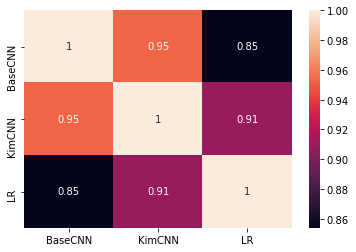

In [66]:
#Ensemble 3 models
ensemble_results_train = pd.DataFrame()
ensemble_results_test = pd.DataFrame()
clf_list = []
for clf in models_algo:
    clf_list += [clf[1]]

    ensemble_results_train = pd.concat([ensemble_results_train,pd.Series(clf[1].predict(X_train_cnn).ravel(), name=clf[0])],axis=1)
    ensemble_results_test = pd.concat([ensemble_results_test,pd.Series(clf[1].predict(X_test_cnn).ravel(), name=clf[0])],axis=1)
ensemble_results_train = pd.concat([ensemble_results_train,pd.Series(LR_model.predict_proba(X_train)[:,1], name="LR")],axis=1)
ensemble_results_test = pd.concat([ensemble_results_test,pd.Series(LR_model.predict_proba(X_test)[:,1], name="LR")],axis=1)    
display(sns.heatmap(ensemble_results_train.corr(),annot=True)) #Calculate correlation
ensemble_results_train = pd.concat([ensemble_results_train.reset_index(drop = True),y_train.reset_index(drop = True)],axis=1)
ensemble_results_test = pd.concat([ensemble_results_test.reset_index(drop = True),y_test.reset_index(drop = True)],axis=1)
print(ensemble_results_test.head())

In [67]:
drop_models =[] # in case we drop models

In [68]:
def ROC_evaluate(**params):
    # warnings.simplefilter('ignore')
    
    s = sum(params.values())
    for p in params:
        params[p] = params[p] / s
    
    test_pred_proba = pd.Series(np.zeros(ensemble_results_train.shape[0]), index = ensemble_results_train.index)
    
    feats = [f for f in ensemble_results_train.columns if f not in ['sentiment'] + drop_models]
    
    for f in feats:
        test_pred_proba += ensemble_results_train[f] * params[f]
    
    return roc_auc_score(ensemble_results_train['sentiment'], test_pred_proba)

In [69]:
from bayes_opt import BayesianOptimization
params = {}
for c in ensemble_results_train.columns.drop(['sentiment' ]+ drop_models):
    params[c] = (0, 1)
    
bo = BayesianOptimization(ROC_evaluate, params)
#bo.maximize(init_points = 10, n_iter = 10)
bo.maximize( init_points = 10,n_iter = 30)

|   iter    |  target   |  BaseCNN  |  KimCNN   |    LR     |
-------------------------------------------------------------
|  1        |  0.999    |  0.8175   |  0.825    |  0.8023   |
|  2        |  0.9986   |  0.1344   |  0.3609   |  0.579    |
|  3        |  0.9992   |  0.8504   |  0.8599   |  0.2671   |
|  4        |  0.9989   |  0.664    |  0.9777   |  0.9976   |
|  5        |  0.9988   |  0.2712   |  0.7752   |  0.7284   |
|  6        |  0.9985   |  0.6505   |  0.01675  |  0.9854   |
|  7        |  0.9988   |  0.1447   |  0.6266   |  0.3702   |
|  8        |  0.9993   |  0.6383   |  0.2425   |  0.06346  |
|  9        |  0.9986   |  0.09233  |  0.3351   |  0.3929   |
|  10       |  0.9989   |  0.766    |  0.06472  |  0.5132   |
|  11       |  0.9993   |  0.7932   |  0.635    |  0.05323  |
|  12       |  0.999    |  0.8666   |  0.719    |  0.9525   |
|  13       |  0.9984   |  0.06094  |  0.478    |  0.5448   |
|  14       |  0.9991   |  0.6377   |  0.3521   |  0.4258   |
|  15   

In [70]:
bo.max['params']

{'BaseCNN': 0.98878916807065,
 'KimCNN': 0.9721144058718445,
 'LR': 0.0005361269188631779}

In [71]:
best_normalized_params = {}

s = sum(bo.max['params'].values())
for p in bo.max['params']:
    best_normalized_params[p] = bo.max['params'][p] / s

best_normalized_params

{'BaseCNN': 0.5041139769101377,
 'KimCNN': 0.49561268972222017,
 'LR': 0.0002733333676420132}

In [72]:
prediction_test = pd.Series(np.zeros(ensemble_results_test.shape[0]), index = ensemble_results_test.index)
    
feats = [f for f in ensemble_results_test.columns if f not in ['sentiment'] + drop_models ]
    
for f in feats:
    prediction_test += ensemble_results_test[f] * best_normalized_params[f]
    
roc_auc_score(ensemble_results_test['sentiment'], prediction_test)

0.9835890873544832

In [73]:
for c in ensemble_results_test.columns.drop('sentiment'):
    print(c, roc_auc_score(ensemble_results_test['sentiment'], ensemble_results_test[c]))

BaseCNN 0.9817101217453122
KimCNN 0.9745682040344797
LR 0.9739191326757309


### **Explainable AI with SHAP**

In [74]:
# !!!!!! shap.DeepExplainer not working with tensorflow 2.X https://stackoverflow.com/questions/66814523/shap-deepexplainer-with-tensorflow-2-4-error

import tensorflow as tf    
tf.compat.v1.disable_v2_behavior() # <-- HERE !


from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten, Dense, Dropout, AlphaDropout, ThresholdedReLU, Convolution1D, ZeroPadding1D, Activation, MaxPooling1D, SpatialDropout1D, Input 
from tensorflow.keras.layers import GlobalMaxPooling1D, concatenate, LSTM, Bidirectional,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Instructions for updating:
non-resource variables are not supported in the long term


In [75]:
# We train simple base CNN

print('Build model...')
model = Sequential(
        [
            Embedding(
                input_dim=NB_WORDS,
                output_dim=EMBEDDING_DIM,
                input_length=MAX_LEN),
            Convolution1D(
                filters=64,
                kernel_size=3,
                padding='same',
                activation='relu'),
            MaxPooling1D(),
            Flatten(),
            Dense(
                100,
                activation='relu'),
            Dense(
                1,
                activation='sigmoid')],
                name = "BaseCNN")
 
model.summary()





# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train_cnn, y_train,
          batch_size=BATCH_SIZE,
          epochs=5,
          validation_data=(X_valid_cnn, y_valid))
score, acc = model.evaluate(X_test_cnn, y_test,
                            batch_size=BATCH_SIZE)
print('Test score:', score)
print('Test accuracy:', acc)




Build model...
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "BaseCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 100)          1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 250, 64)           19264     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 125, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               800100    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


19869/19869 [==============================] - 24s 1ms/sample - loss: 0.2180 - acc: 0.8916 - val_loss: 0.1516 - val_acc: 0.9093
Epoch 2/5
19869/19869 [==============================] - 24s 1ms/sample - loss: 0.1265 - acc: 0.9178 - val_loss: 0.1197 - val_acc: 0.9404
Epoch 3/5
19869/19869 [==============================] - 24s 1ms/sample - loss: 0.0895 - acc: 0.9693 - val_loss: 0.1238 - val_acc: 0.9504
Epoch 4/5
19869/19869 [==============================] - 24s 1ms/sample - loss: 0.0722 - acc: 0.9869 - val_loss: 0.1480 - val_acc: 0.9498
Epoch 5/5
19869/19869 [==============================] - 24s 1ms/sample - loss: 0.0652 - acc: 0.9926 - val_loss: 0.1712 - val_acc: 0.9512
Test score: 0.16527110115018678
Test accuracy: 0.94983035


In [76]:
import shap
# select a set of samples to take an expectation over

distrib_samples = X_train_cnn[:100]
explainer = shap.DeepExplainer( model, distrib_samples)


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.


In [77]:
num_explanations = 50
shap_values = explainer.shap_values(X_test_cnn[:num_explanations])

In [78]:
shap_values

[array([[ 8.08034915e-05, -7.58624819e-03, -2.32934206e-04, ...,
          9.49872526e-16,  6.56276315e-16,  4.90855762e-16],
        [-1.29361084e-02, -7.23173318e-03, -1.04859277e-02, ...,
          1.62789635e-05,  1.14714281e-05,  9.37841975e-06],
        [ 5.42636221e-04, -1.14072639e-02, -1.24717680e-03, ...,
          2.84083215e-07,  1.99452879e-07,  1.61905976e-07],
        ...,
        [ 1.01287249e-03,  1.12701490e-03, -1.31731798e-03, ...,
          1.18922202e-11,  8.26948784e-12,  6.52934453e-12],
        [-6.24373441e-04, -7.40038593e-04, -4.60665961e-03, ...,
          2.46494949e-07,  1.73037906e-07,  1.40411632e-07],
        [-9.95762660e-04, -3.34220326e-03, -1.19177554e-03, ...,
          9.83120750e-19,  6.87621049e-19,  4.67306980e-19]])]

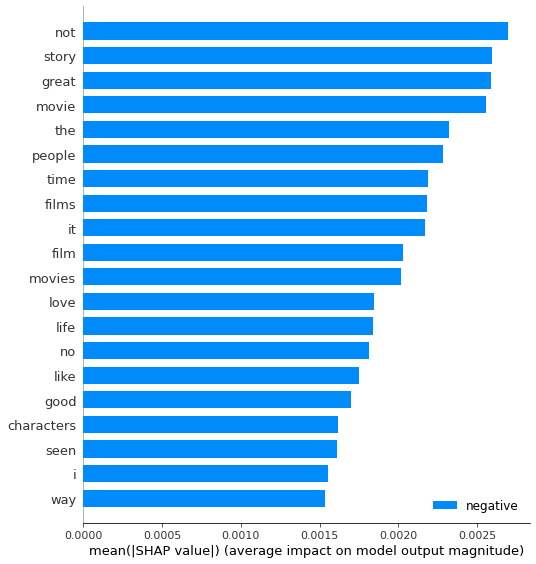

In [79]:
num2word = {}
for w in word_index.keys():
    num2word[word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_cnn[i]))) for i in range(num_explanations)])
shap.summary_plot(shap_values, feature_names = list(num2word.values()), class_names = list(label_map.keys()),)

In [84]:
# init the JS visualization code

# create dict to invert word_idx k,v order
num2word = {}
for w in word_index.keys():
    num2word[word_index[w]] = w
x_test_words = np.stack([np.array(list(map(lambda x: num2word.get(x, "NONE"), X_test_cnn[i]))) for i in range(50)])




In [85]:
# plot the explanation of a given prediction for 2 example
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][1], x_test_words[1])

In [87]:

# plot the explanation of a given prediction for 13 example
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][12], x_test_words[12])

In [91]:
# plot the explanation of a given prediction for 34 example
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][33], x_test_words[33])

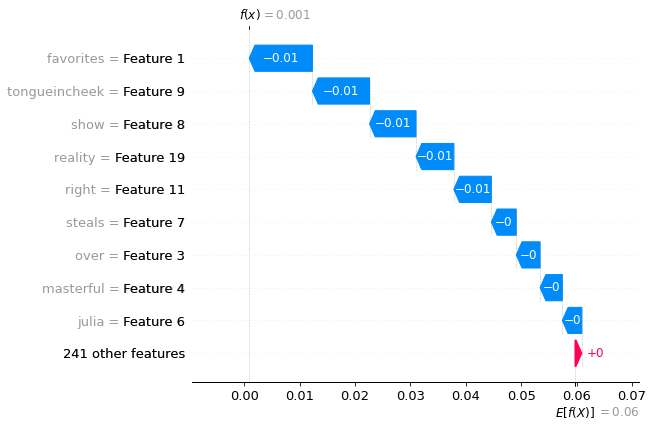

In [92]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][2],x_test_words[2])

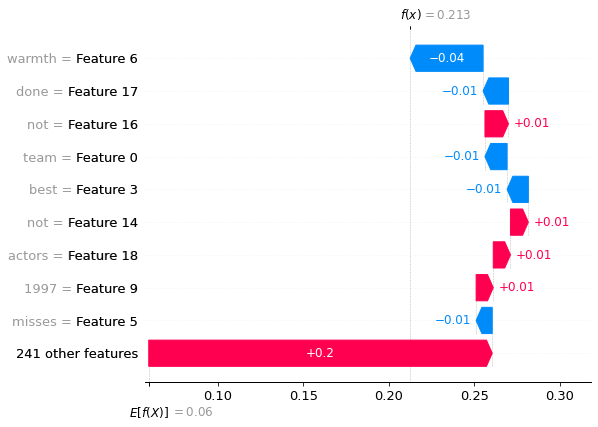

In [93]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][12],x_test_words[12])

In [98]:
# print the JS visualization code to the notebook
shap.initjs()
# visualize the negaitve tweets
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_cnn[:50])